In [1]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


### 数据集路径设置及样本查看

In [2]:
# 查看input文件夹中的文件
base_dir = "./data"
os.listdir(base_dir)

['test_set', 'training_set']

In [3]:
data_path = Path("./data")
train_path = data_path / "training_set"
test_path = data_path / "test_set"
train_path, test_path


(WindowsPath('data/training_set'), WindowsPath('data/test_set'))

In [4]:
train_list = list(train_path.glob("*/*.jpg")) # 获得所有样本的路径
test_list = list(test_path.glob("*/*.jpg"))

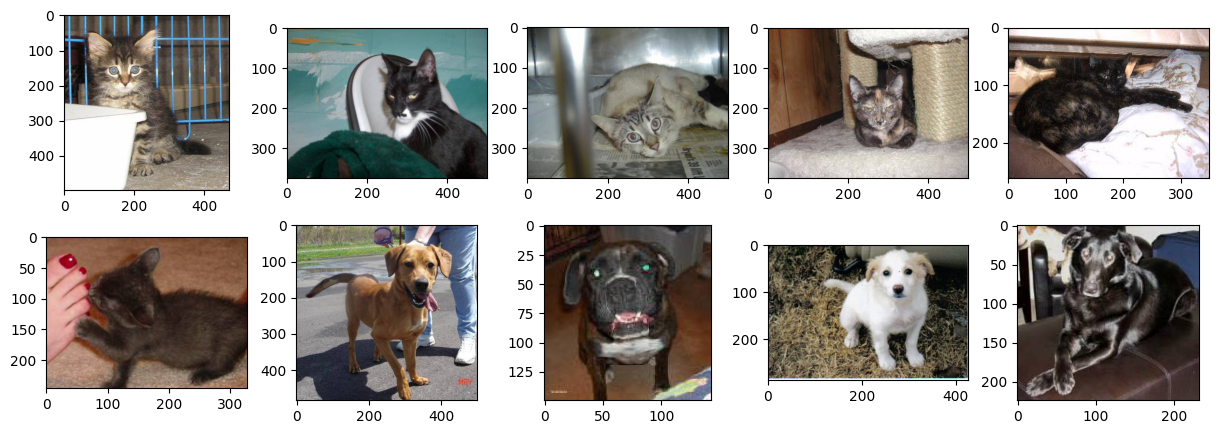

In [5]:
random_idx = np.random.randint(1, 8000, size=10)

fig = plt.figure(figsize = (15, 5))
i = 1

for idx in random_idx:
    ax = fig.add_subplot(2, 5, i)
    img = Image.open(train_list[idx])
    plt.imshow(img)
    i += 1

# plt.axis('off')
plt.show()

### 数据集的预处理、构建以及加载

In [6]:
# 数据集的预处理
data_transform = transforms.Compose([
    transforms.Resize((224, 224)), #尺寸缩放
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                        std=(0.229, 0.224, 0.225))
])

# 数据集构建
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=data_transform)

# 数据集的加载
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

### 自定义卷积神经网络模型训练

In [7]:
class My_CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(3*3*64, 10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 3, 224, 224)  # 将输入数据展开成1维张量
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        # 卷积层到全连接层要拉伸成向量
        x = x.view(x.size(0), -1) # -1自动计算
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x




In [8]:
net = My_CNN()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(),lr=0.001)
Epoch = 10


In [9]:
# 在训练集上训练
for epoch in range(Epoch):
    train_loss = 0.0
    for i, (datas, labels) in enumerate(train_loader):
        i += 1
        datas, labels = (datas, labels)
        datas, labels = datas, labels
        # print(datas.shape)
        optimizer.zero_grad()  # 将优化器清零
        results = net(datas)

        loss = loss_function(results, labels)

        loss.backward()  # 反向传播
        optimizer.step()  # 参数更新

        train_loss += loss.item()

        if i % 100 == 0:
            print(f"epoch:{epoch + 1} loss:{train_loss:.4f}")
            train_loss = 0
    


epoch:1 loss:67.6721
epoch:1 loss:64.8810
epoch:2 loss:63.2373
epoch:2 loss:63.4815
epoch:3 loss:61.0725
epoch:3 loss:61.3297
epoch:4 loss:60.4164
epoch:4 loss:60.1520
epoch:5 loss:59.1253
epoch:5 loss:59.0682
epoch:6 loss:59.6321
epoch:6 loss:58.1314
epoch:7 loss:57.6490
epoch:7 loss:57.5930
epoch:8 loss:56.5460
epoch:8 loss:57.3448
epoch:9 loss:56.2925
epoch:9 loss:55.8461
epoch:10 loss:55.2192
epoch:10 loss:55.4204


In [10]:
# 在测试集上评估
correct = 0
total = 0
with torch.no_grad(): # 不需要计算梯度
    for i, (datas, labels) in enumerate(test_loader):
        datas, labels = (datas, labels)
        datas, labels = datas, labels
        
        output = net(datas)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('accuracy:%.2f%%' % (100 * correct / total))


accuracy:69.90%


In [11]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

### VGG网络

In [12]:
# 导入预训练模型
weights = models.VGG16_Weights.IMAGENET1K_V1
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
# 抽取VGG网络的部分模块，并在训练中冻结其中的训练参数
vgg = vgg16.features
for param in vgg.parameters():
    param.requires_grad = False


In [14]:
class VGG(nn.Module):
    def __init__(self) -> None:
        super(VGG, self).__init__()
        self.vgg = vgg
        self.classifier = nn.Sequential(
            nn.Linear(25088, 512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 2),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = x.view(-1, 3, 224, 224)  # 将输入数据展开成1维张量
        x = self.vgg(x)

        x = x.view(x.size(0), -1)
        x = self.classifier(x)
    
        return x



In [15]:
net = VGG()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(),lr=0.001)
Epoch = 10

In [16]:
# 在训练集上训练
for epoch in range(Epoch):
    train_loss = 0.0
    for i, (datas, labels) in enumerate(train_loader):
        i += 1
        datas, labels = (datas, labels)
        datas, labels = datas, labels
        # print(datas.shape)
        optimizer.zero_grad()  # 将优化器清零
        results = net(datas)

        loss = loss_function(results, labels)

        loss.backward()  # 反向传播
        optimizer.step()  # 参数更新

        train_loss += loss.item()

        if i % 100 == 0:
            print(f"epoch:{epoch + 1} loss:{train_loss:.4f}")
            train_loss = 0
    


epoch:1 loss:36.0614
epoch:1 loss:33.6562
epoch:2 loss:32.4493
epoch:2 loss:32.4014
epoch:3 loss:32.0189
epoch:3 loss:32.1239
epoch:4 loss:31.9398
epoch:4 loss:31.8434
epoch:5 loss:31.8095
epoch:5 loss:31.7466
epoch:6 loss:31.6724
epoch:6 loss:31.5792
epoch:7 loss:31.4738
epoch:7 loss:31.6788
epoch:8 loss:31.5163
epoch:8 loss:31.5245
epoch:9 loss:31.5927
epoch:9 loss:31.4567
epoch:10 loss:31.5403
epoch:10 loss:31.5261


In [17]:
# 在测试集上评估
correct = 0
total = 0
with torch.no_grad(): # 不需要计算梯度
    for i, (datas, labels) in enumerate(test_loader):
        datas, labels = (datas, labels)
        datas, labels = datas, labels
        
        output = net(datas)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('accuracy:%.2f%%' % (100 * correct / total))


accuracy:98.65%
